<span style="display:block; font-size:4rem; color:white;">Car Resale Value</span>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
import math 

In [2]:
df = pd.read_csv('used_car.csv')

In [3]:
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


<span style="display:block; font-size:2rem; color:orange;">Feature Exploration</span>

In [5]:
df['Name'].unique()

array(['Maruti Wagon R LXI CNG', 'Hyundai Creta 1.6 CRDi SX Option',
       'Honda Jazz V', ..., 'Ford EcoSport 1.5 Petrol Ambiente',
       'Jeep Compass 1.4 Sport', 'Hyundai Elite i20 Magna Plus'],
      dtype=object)

In [6]:
print(df[df["Name"]=='Maruti Wagon R LXI CNG'])

      S.No.                    Name   Location  Year  Kilometers_Driven  \
0         0  Maruti Wagon R LXI CNG     Mumbai  2010              72000   
127     127  Maruti Wagon R LXI CNG       Pune  2013              89900   
1218   1218  Maruti Wagon R LXI CNG       Pune  2015              70000   
1357   1357  Maruti Wagon R LXI CNG     Mumbai  2014              40000   
1780   1780  Maruti Wagon R LXI CNG     Mumbai  2013              25755   
1911   1911  Maruti Wagon R LXI CNG  Ahmedabad  2016              77000   
2376   2376  Maruti Wagon R LXI CNG  Hyderabad  2013              83875   
2638   2638  Maruti Wagon R LXI CNG       Pune  2012              90400   
3008   3008  Maruti Wagon R LXI CNG      Delhi  2014              48500   
3097   3097  Maruti Wagon R LXI CNG       Pune  2012              92000   
3295   3295  Maruti Wagon R LXI CNG      Delhi  2013              62000   
3455   3455  Maruti Wagon R LXI CNG     Mumbai  2014              41000   
4411   4411  Maruti Wagon

In [7]:
df["Location"].nunique()

11

In [8]:
df["Location"].isnull().sum()

0

<BarContainer object of 11 artists>

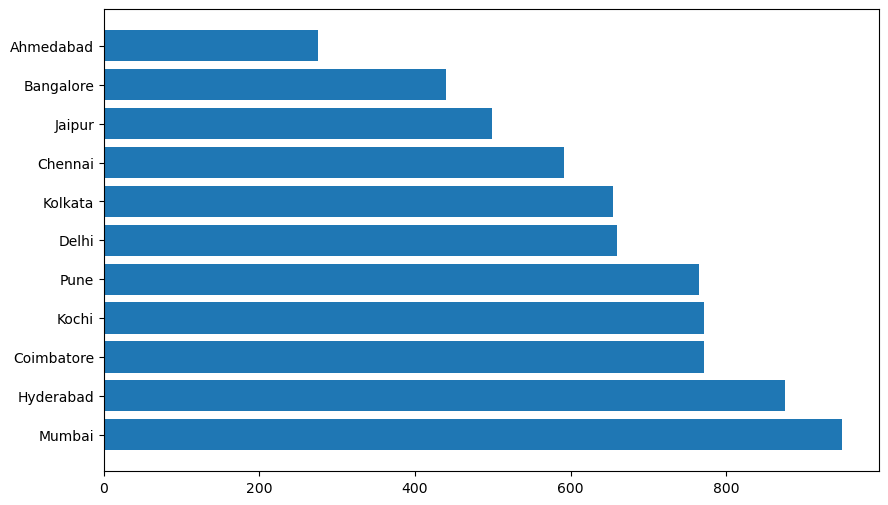

In [9]:
plt.figure(figsize=(10,6))
plt.barh(df["Location"].value_counts().index, df["Location"].value_counts().values)

In [10]:
df["Year"].unique()

array([2010, 2015, 2011, 2012, 2013, 2016, 2018, 2014, 2017, 2007, 2009,
       2008, 2019, 2006, 2005, 2004, 2002, 2000, 2003, 1999, 2001, 1998,
       1996], dtype=int64)

In [11]:
df["Year"].isnull().sum()

0

<BarContainer object of 23 artists>

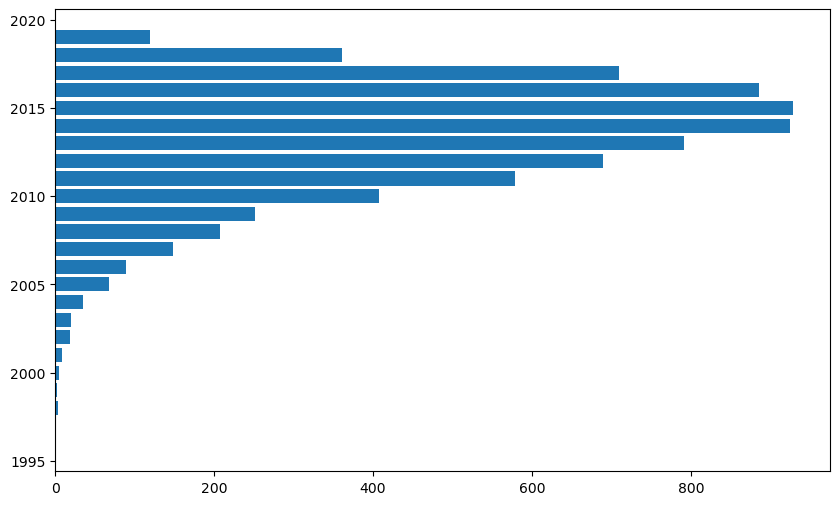

In [12]:
plt.figure(figsize=(10,6))
plt.barh(df["Year"].value_counts().index, df["Year"].value_counts().values, )

In [13]:
df["Kilometers_Driven"].nunique()

3660

In [14]:
df["Kilometers_Driven"].dtype

dtype('int64')

In [15]:
df["Kilometers_Driven"].head(20)

0      72000
1      41000
2      46000
3      87000
4      40670
5      75000
6      86999
7      36000
8      64430
9      65932
10     25692
11     60000
12     64424
13     72000
14     85000
15    110000
16     58950
17     25000
18     77469
19     78500
Name: Kilometers_Driven, dtype: int64

In [16]:
df["Kilometers_Driven"].isnull().sum()

0

In [17]:
df["Fuel_Type"].unique()   

array(['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric'], dtype=object)

In [18]:
df["Fuel_Type"].isnull().sum()

0

<BarContainer object of 5 artists>

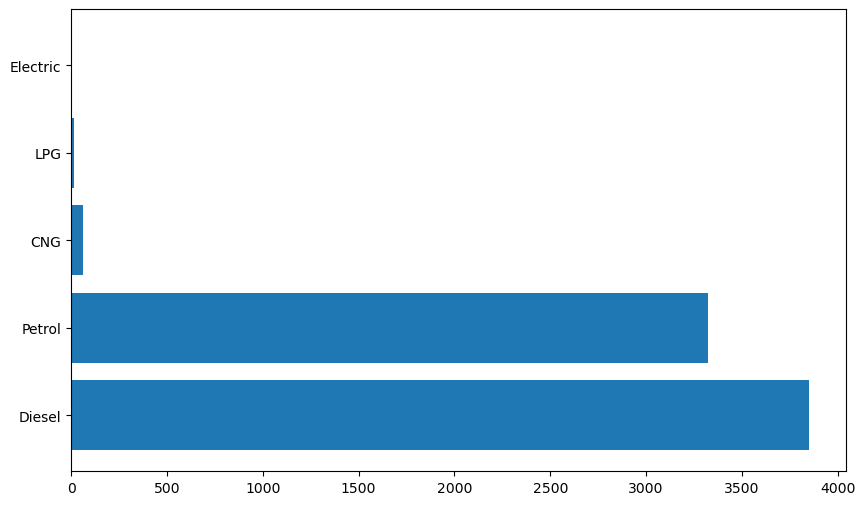

In [19]:
plt.figure(figsize=(10,6))
plt.barh(df["Fuel_Type"].value_counts().index, df["Fuel_Type"].value_counts().values)

In [20]:
df["Transmission"].isnull().sum()

0

In [21]:
df["Owner_Type"].isnull().sum()

0

In [22]:
df["Owner_Type"].nunique()

4

In [23]:
df["Mileage"].head()

0    26.6 km/kg
1    19.67 kmpl
2     18.2 kmpl
3    20.77 kmpl
4     15.2 kmpl
Name: Mileage, dtype: object

In [24]:
df["Mileage"].isnull().sum()

2

In [25]:
df["Engine"].nunique()

150

In [26]:
df["Engine"].isnull().sum()

46

In [27]:
df["Power"].nunique()

386

In [28]:
df["Power"].isnull().sum()

46

In [29]:
df["Seats"].unique()

array([ 5.,  7.,  8.,  4.,  6.,  2., nan, 10.,  9.,  0.])

In [30]:
df["Seats"].isnull().sum()

53

In [31]:
df["New_Price"].isnull().sum()

6247

In [32]:
df["New_Price"].nunique()

625

In [33]:
df["Price"].nunique()

1373

In [34]:
df["Price"].isnull().sum()  

1234

In [35]:
df["S.No."].isnull().sum()

0

<span style="display:block; font-size:2rem; color:orange;">Feature Manipulation</span>

In [36]:
df["car_make"] = df["Name"].str.split(" ").str[0]
df["car_model"] = df["Name"].str.split(" ").str[1]
df["car_spec"] = df["Name"].fillna("").apply(lambda x: " ".join(str(x).split(" ")[2:]))

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
 14  car_make           7253 non-null   object 
 15  car_model          7253 non-null   object 
 16  car_spec           7253 

In [38]:
df = df.drop(columns=["S.No.", "Name"], axis=1)

In [39]:
df["car_age"] = 2025 - df["Year"]

In [40]:
df["car_age"].unique()

array([15, 10, 14, 13, 12,  9,  7, 11,  8, 18, 16, 17,  6, 19, 20, 21, 23,
       25, 22, 26, 24, 27, 29], dtype=int64)

In [41]:
region_mapping = {
    'Chennai': 'South',
    'Jaipur': 'North',
    'Pune': 'West',
    'Mumbai': 'West',
    'Kolkata': 'East',
    'Delhi': 'North',
    'Ahmedabad': 'West',
    'Hyderabad': 'South',
    'Coimbatore': 'South',
    'Bangalore': 'South',
    'Kochi': 'South'
}
df['Region'] = df['Location'].map(region_mapping)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           7253 non-null   object 
 1   Year               7253 non-null   int64  
 2   Kilometers_Driven  7253 non-null   int64  
 3   Fuel_Type          7253 non-null   object 
 4   Transmission       7253 non-null   object 
 5   Owner_Type         7253 non-null   object 
 6   Mileage            7251 non-null   object 
 7   Engine             7207 non-null   object 
 8   Power              7207 non-null   object 
 9   Seats              7200 non-null   float64
 10  New_Price          1006 non-null   object 
 11  Price              6019 non-null   float64
 12  car_make           7253 non-null   object 
 13  car_model          7253 non-null   object 
 14  car_spec           7253 non-null   object 
 15  car_age            7253 non-null   int64  
 16  Region             7253 

In [43]:
df["Region"].unique()

array(['West', 'South', 'North', 'East'], dtype=object)

In [44]:
df = df.drop(columns=["Location"], axis=1)

In [45]:
df = pd.get_dummies(df, columns=["Region"], drop_first=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               7253 non-null   int64  
 1   Kilometers_Driven  7253 non-null   int64  
 2   Fuel_Type          7253 non-null   object 
 3   Transmission       7253 non-null   object 
 4   Owner_Type         7253 non-null   object 
 5   Mileage            7251 non-null   object 
 6   Engine             7207 non-null   object 
 7   Power              7207 non-null   object 
 8   Seats              7200 non-null   float64
 9   New_Price          1006 non-null   object 
 10  Price              6019 non-null   float64
 11  car_make           7253 non-null   object 
 12  car_model          7253 non-null   object 
 13  car_spec           7253 non-null   object 
 14  car_age            7253 non-null   int64  
 15  Region_North       7253 non-null   bool   
 16  Region_South       7253 

In [46]:
df["Kilometers_Driven"].dtype

dtype('int64')

In [47]:
df["Transmission"].value_counts()

Transmission
Manual       5204
Automatic    2049
Name: count, dtype: int64

In [48]:
df = pd.get_dummies(df, columns=["Transmission"], drop_first=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 7253 non-null   int64  
 1   Kilometers_Driven    7253 non-null   int64  
 2   Fuel_Type            7253 non-null   object 
 3   Owner_Type           7253 non-null   object 
 4   Mileage              7251 non-null   object 
 5   Engine               7207 non-null   object 
 6   Power                7207 non-null   object 
 7   Seats                7200 non-null   float64
 8   New_Price            1006 non-null   object 
 9   Price                6019 non-null   float64
 10  car_make             7253 non-null   object 
 11  car_model            7253 non-null   object 
 12  car_spec             7253 non-null   object 
 13  car_age              7253 non-null   int64  
 14  Region_North         7253 non-null   bool   
 15  Region_South         7253 non-null   b

In [49]:
df["Owner_Type"].value_counts()

Owner_Type
First             5952
Second            1152
Third              137
Fourth & Above      12
Name: count, dtype: int64

In [50]:
df = pd.get_dummies(df, columns=["Fuel_Type", "Owner_Type"], drop_first=True)


In [51]:
df.columns

Index(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price', 'car_make', 'car_model', 'car_spec', 'car_age',
       'Region_North', 'Region_South', 'Region_West', 'Transmission_Manual',
       'Fuel_Type_Diesel', 'Fuel_Type_Electric', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Owner_Type_Fourth & Above', 'Owner_Type_Second',
       'Owner_Type_Third'],
      dtype='object')

In [52]:
df["Mileage"].head(20)

0     26.6 km/kg
1     19.67 kmpl
2      18.2 kmpl
3     20.77 kmpl
4      15.2 kmpl
5     21.1 km/kg
6     23.08 kmpl
7     11.36 kmpl
8     20.54 kmpl
9      22.3 kmpl
10    21.56 kmpl
11     16.8 kmpl
12     25.2 kmpl
13     12.7 kmpl
14      0.0 kmpl
15     13.5 kmpl
16     25.8 kmpl
17     28.4 kmpl
18    20.45 kmpl
19    14.84 kmpl
Name: Mileage, dtype: object

In [53]:
df["mileage_no"] = df["Mileage"].str.split(' ').str[0]

df["mileage_unit"] = df["Mileage"].str.split(' ').str[1]

In [54]:
df.columns

Index(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price', 'car_make', 'car_model', 'car_spec', 'car_age',
       'Region_North', 'Region_South', 'Region_West', 'Transmission_Manual',
       'Fuel_Type_Diesel', 'Fuel_Type_Electric', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Owner_Type_Fourth & Above', 'Owner_Type_Second',
       'Owner_Type_Third', 'mileage_no', 'mileage_unit'],
      dtype='object')

In [55]:
df["mileage_unit"].nunique()

2

In [56]:
df["mileage_unit"].fillna('kmpl', inplace=True)

C:\Users\Ashu\AppData\Local\Temp\ipykernel_34188\3778741412.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["mileage_unit"].fillna('kmpl', inplace=True)


In [57]:
df["mileage_unit"].isnull().sum()

0

In [58]:
df["mileage_no"] = df["mileage_no"].astype(float)

In [59]:
df["mileage_no"].fillna(df["mileage_no"].mean(), inplace=True)

C:\Users\Ashu\AppData\Local\Temp\ipykernel_34188\1480113219.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["mileage_no"].fillna(df["mileage_no"].mean(), inplace=True)


In [60]:
df["mileage_no"].isnull().sum()

0

In [61]:
df = df.drop(columns=["Mileage"], axis=1)

In [62]:
df.columns

Index(['Year', 'Kilometers_Driven', 'Engine', 'Power', 'Seats', 'New_Price',
       'Price', 'car_make', 'car_model', 'car_spec', 'car_age', 'Region_North',
       'Region_South', 'Region_West', 'Transmission_Manual',
       'Fuel_Type_Diesel', 'Fuel_Type_Electric', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Owner_Type_Fourth & Above', 'Owner_Type_Second',
       'Owner_Type_Third', 'mileage_no', 'mileage_unit'],
      dtype='object')

In [63]:
df["Engine"].head(20)

0      998 CC
1     1582 CC
2     1199 CC
3     1248 CC
4     1968 CC
5      814 CC
6     1461 CC
7     2755 CC
8     1598 CC
9     1248 CC
10    1462 CC
11    1497 CC
12    1248 CC
13    2179 CC
14    2179 CC
15    2477 CC
16    1498 CC
17    1248 CC
18    1461 CC
19    2143 CC
Name: Engine, dtype: object

In [64]:
df["Engine"] = df["Engine"].str.replace(" CC", "")
df["Engine"] = df["Engine"].str.replace(" ", "")

In [65]:
df["Engine"].head(20)
df["Engine"] = pd.to_numeric(df["Engine"], errors='coerce')

In [66]:
df["Engine"].head(20)

0      998.0
1     1582.0
2     1199.0
3     1248.0
4     1968.0
5      814.0
6     1461.0
7     2755.0
8     1598.0
9     1248.0
10    1462.0
11    1497.0
12    1248.0
13    2179.0
14    2179.0
15    2477.0
16    1498.0
17    1248.0
18    1461.0
19    2143.0
Name: Engine, dtype: float64

In [67]:
df["Engine"].isnull().sum()

46

In [68]:
df["Engine"].fillna(df["Engine"].median(), inplace=True)

C:\Users\Ashu\AppData\Local\Temp\ipykernel_34188\613110157.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Engine"].fillna(df["Engine"].median(), inplace=True)


In [69]:
df["Engine"].isnull().sum()

0

In [70]:
df["Power"].head(20)  

0      58.16 bhp
1      126.2 bhp
2       88.7 bhp
3      88.76 bhp
4      140.8 bhp
5       55.2 bhp
6       63.1 bhp
7      171.5 bhp
8      103.6 bhp
9         74 bhp
10    103.25 bhp
11     116.3 bhp
12        74 bhp
13     187.7 bhp
14       115 bhp
15    175.56 bhp
16      98.6 bhp
17        74 bhp
18      83.8 bhp
19    167.62 bhp
Name: Power, dtype: object

In [71]:
df["Power"] = df["Power"].str.replace(" bhp", "")

In [72]:

df["Power"] = pd.to_numeric(df["Power"], errors='coerce')

In [73]:
df["Power"].head(20) 

0      58.16
1     126.20
2      88.70
3      88.76
4     140.80
5      55.20
6      63.10
7     171.50
8     103.60
9      74.00
10    103.25
11    116.30
12     74.00
13    187.70
14    115.00
15    175.56
16     98.60
17     74.00
18     83.80
19    167.62
Name: Power, dtype: float64

In [74]:
df["Power"].isnull().sum()

175

In [75]:
df.columns

Index(['Year', 'Kilometers_Driven', 'Engine', 'Power', 'Seats', 'New_Price',
       'Price', 'car_make', 'car_model', 'car_spec', 'car_age', 'Region_North',
       'Region_South', 'Region_West', 'Transmission_Manual',
       'Fuel_Type_Diesel', 'Fuel_Type_Electric', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Owner_Type_Fourth & Above', 'Owner_Type_Second',
       'Owner_Type_Third', 'mileage_no', 'mileage_unit'],
      dtype='object')

<span style="display:block; font-size:1.5rem; color:green;">Using K Nearest Neighbour for missing valaue in Power Column</span>

In [76]:
# Features used for KNN Imputer
features = ["mileage_no", "Engine", "car_age", "Kilometers_Driven", "Year"]

In [77]:
# Clean and convert numeric columns to proper numeric types (if needed)
for col in features + ['Power']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# This basically creates a new dataframe for imputation - include Power column with missing values
impute_data = df[features + ['Power']]

# Scale the data for better neighbor calculation
scaler = StandardScaler()
impute_data_scaled = scaler.fit_transform(impute_data)

In [78]:
# Initialize KNN imputer, e.g., with 5 neighbors
imputer = KNNImputer(n_neighbors=5)

# Fit and transform to impute missing Power values
imputed_array = imputer.fit_transform(impute_data_scaled)

# Back to normal scale from standardized scale
imputed_values = scaler.inverse_transform(imputed_array)

# Update Power column in original dataframe
df['Power'] = imputed_values[:, -1]


In [79]:
df["Power"].isnull().sum()  

0

In [80]:
df["Seats"].value_counts()

Seats
5.0     6047
7.0      796
8.0      170
4.0      119
6.0       38
2.0       18
10.0       8
9.0        3
0.0        1
Name: count, dtype: int64

In [81]:
df[df["Seats"] == 0]

,Year,Kilometers_Driven,Engine,Power,Seats,New_Price,Price,car_make,car_model,car_spec,...,Transmission_Manual,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,mileage_no,mileage_unit
3999,2012,125000,3197.0,183.92,0.0,NaN,18.0,Audi,A4,3.2 FSI Tiptronic Quattro,...,False,False,False,False,True,False,False,False,10.5,kmpl


In [82]:
df["Seats"].replace(to_replace=0, value=5.0, inplace=True)

C:\Users\Ashu\AppData\Local\Temp\ipykernel_34188\2031651983.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Seats"].replace(to_replace=0, value=5.0, inplace=True)


In [83]:
df["Seats"].value_counts()

Seats
5.0     6048
7.0      796
8.0      170
4.0      119
6.0       38
2.0       18
10.0       8
9.0        3
Name: count, dtype: int64

In [84]:
df.columns

Index(['Year', 'Kilometers_Driven', 'Engine', 'Power', 'Seats', 'New_Price',
       'Price', 'car_make', 'car_model', 'car_spec', 'car_age', 'Region_North',
       'Region_South', 'Region_West', 'Transmission_Manual',
       'Fuel_Type_Diesel', 'Fuel_Type_Electric', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Owner_Type_Fourth & Above', 'Owner_Type_Second',
       'Owner_Type_Third', 'mileage_no', 'mileage_unit'],
      dtype='object')

In [85]:
df["New_Price"].head(20)

0            NaN
1            NaN
2      8.61 Lakh
3            NaN
4            NaN
5            NaN
6            NaN
7        21 Lakh
8            NaN
9            NaN
10    10.65 Lakh
11           NaN
12           NaN
13           NaN
14           NaN
15    32.01 Lakh
16           NaN
17           NaN
18           NaN
19           NaN
Name: New_Price, dtype: object

In [86]:
df["New_Price"].nunique()

625

In [87]:
df["New_Price"].isnull().sum()  

6247

In [88]:
df["Price"].isnull().sum()

1234

In [89]:
df["new_price_no"] = df["New_Price"].str.split(' ').str[0]

df["new_price_unit"] = df["New_Price"].str.split(' ').str[1]

In [90]:
if df["new_price_no"].dtype != np.number:
    # This will convert all numeric strings to float.
    # If a value is non numeric it will set to NaN
    df['new_price_no'] = pd.to_numeric(df.new_price_no, errors='coerce')

# Conversion factor
Cr_conv = 100

# Multiplier function to convert instance of new_price_no in Cr to Lakh
df.loc[df['new_price_unit'] == 'Cr', ['new_price_no']] *= Cr_conv

# Drop 'new_price_unit' column
df = df.drop(columns='new_price_unit')

C:\Users\Ashu\AppData\Local\Temp\ipykernel_34188\1366413380.py:1: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df["new_price_no"].dtype != np.number:


In [91]:
df.drop(columns='New_Price', inplace=True)

In [92]:
df = df.rename(columns={'new_price_no': 'new_price'})

In [93]:
df.columns.value_counts()

Year                         1
Kilometers_Driven            1
mileage_unit                 1
mileage_no                   1
Owner_Type_Third             1
Owner_Type_Second            1
Owner_Type_Fourth & Above    1
Fuel_Type_Petrol             1
Fuel_Type_LPG                1
Fuel_Type_Electric           1
Fuel_Type_Diesel             1
Transmission_Manual          1
Region_West                  1
Region_South                 1
Region_North                 1
car_age                      1
car_spec                     1
car_model                    1
car_make                     1
Price                        1
Seats                        1
Power                        1
Engine                       1
new_price                    1
Name: count, dtype: int64

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       7253 non-null   int64  
 1   Kilometers_Driven          7253 non-null   int64  
 2   Engine                     7253 non-null   float64
 3   Power                      7253 non-null   float64
 4   Seats                      7200 non-null   float64
 5   Price                      6019 non-null   float64
 6   car_make                   7253 non-null   object 
 7   car_model                  7253 non-null   object 
 8   car_spec                   7253 non-null   object 
 9   car_age                    7253 non-null   int64  
 10  Region_North               7253 non-null   bool   
 11  Region_South               7253 non-null   bool   
 12  Region_West                7253 non-null   bool   
 13  Transmission_Manual        7253 non-null   bool 

In [95]:
# Convert variables with "object" type to "category" type
for i in df.columns:
    if df[i].dtypes == "object":
        df[i] = df[i].astype("category")

# Confirm if there no variables with "object" type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Year                       7253 non-null   int64   
 1   Kilometers_Driven          7253 non-null   int64   
 2   Engine                     7253 non-null   float64 
 3   Power                      7253 non-null   float64 
 4   Seats                      7200 non-null   float64 
 5   Price                      6019 non-null   float64 
 6   car_make                   7253 non-null   category
 7   car_model                  7253 non-null   category
 8   car_spec                   7253 non-null   category
 9   car_age                    7253 non-null   int64   
 10  Region_North               7253 non-null   bool    
 11  Region_South               7253 non-null   bool    
 12  Region_West                7253 non-null   bool    
 13  Transmission_Manual        7253 n

In [96]:
df.describe()

,Year,Kilometers_Driven,Engine,Power,Seats,Price,car_age,mileage_no,new_price
count,7253.000000,7.253000e+03,7253.000000,7253.000000,7200.000000,6019.000000,7253.000000,7253.000000,1006.000000
mean,2013.365366,5.869906e+04,1615.789742,112.143807,5.280417,9.479468,11.634634,18.141580,22.779692
std,3.254421,8.442772e+04,593.475257,53.257307,0.809277,11.187917,3.254421,4.561567,27.759344
min,1996.000000,1.710000e+02,72.000000,34.200000,2.000000,0.440000,6.000000,0.000000,3.910000
25%,2011.000000,3.400000e+04,1198.000000,75.000000,5.000000,3.500000,9.000000,15.170000,7.885000
50%,2014.000000,5.341600e+04,1493.000000,93.700000,5.000000,5.640000,11.000000,18.160000,11.570000
75%,2016.000000,7.300000e+04,1968.000000,138.030000,5.000000,9.950000,14.000000,21.100000,26.042500
max,2019.000000,6.500000e+06,5998.000000,616.000000,10.000000,160.000000,29.000000,33.540000,375.000000


In [97]:
df[df["mileage_no"] == 0]

,Year,Kilometers_Driven,Engine,Power,Seats,Price,car_make,car_model,car_spec,car_age,...,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,mileage_no,mileage_unit,new_price
14,2012,85000,2179.0,115.00,5.0,17.50,Land,Rover,Freelander 2 TD4 SE,13,...,True,False,False,False,False,True,False,0.0,kmpl,NaN
67,2019,15369,1950.0,194.00,5.0,35.67,Mercedes-Benz,C-Class,Progressive C 220d,6,...,True,False,False,False,False,False,False,0.0,kmpl,49.14
79,2005,87591,1086.0,62.00,5.0,1.30,Hyundai,Santro,Xing XL,20,...,False,False,False,True,False,False,False,0.0,kmpl,NaN
194,2007,60006,1493.0,62.00,NaN,2.95,Honda,City,1.5 GXI,18,...,False,False,False,True,False,False,False,0.0,kmpl,NaN
229,2015,70436,1498.0,99.00,NaN,3.60,Ford,Figo,Diesel,10,...,True,False,False,False,False,False,False,0.0,kmpl,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6633,2016,27000,1493.0,127.54,NaN,NaN,Mahindra,TUV,300 P4,9,...,True,False,False,False,False,False,False,0.0,kmpl,NaN
6697,2007,85000,1086.0,62.00,5.0,NaN,Hyundai,Santro,Xing XL,18,...,False,False,False,True,False,True,False,0.0,kmpl,NaN
6857,2011,87000,2179.0,115.00,5.0,NaN,Land,Rover,Freelander 2 TD4 SE,14,...,True,False,False,False,False,False,False,0.0,kmpl,NaN
6957,2019,11574,1199.0,88.70,NaN,NaN,Honda,Jazz,2020 Petrol,6,...,False,False,False,True,False,False,False,0.0,kmpl,NaN


In [98]:
df.mileage_no.replace(to_replace=0, value= np.nan, inplace=True)

C:\Users\Ashu\AppData\Local\Temp\ipykernel_34188\2781123404.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.mileage_no.replace(to_replace=0, value= np.nan, inplace=True)


In [99]:
df["mileage_no"].isnull().sum()

81

In [100]:
df["mileage_unit"].isnull().sum()

0

In [101]:
df["mileage_no"].fillna(df["mileage_no"].mean(), inplace=True)

C:\Users\Ashu\AppData\Local\Temp\ipykernel_34188\1480113219.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["mileage_no"].fillna(df["mileage_no"].mean(), inplace=True)


In [102]:
df.describe()

,Year,Kilometers_Driven,Engine,Power,Seats,Price,car_age,mileage_no,new_price
count,7253.000000,7.253000e+03,7253.000000,7253.000000,7200.000000,6019.000000,7253.000000,7253.000000,1006.000000
mean,2013.365366,5.869906e+04,1615.789742,112.143807,5.280417,9.479468,11.634634,18.346470,22.779692
std,3.254421,8.442772e+04,593.475257,53.257307,0.809277,11.187917,3.254421,4.134049,27.759344
min,1996.000000,1.710000e+02,72.000000,34.200000,2.000000,0.440000,6.000000,6.400000,3.910000
25%,2011.000000,3.400000e+04,1198.000000,75.000000,5.000000,3.500000,9.000000,15.400000,7.885000
50%,2014.000000,5.341600e+04,1493.000000,93.700000,5.000000,5.640000,11.000000,18.346470,11.570000
75%,2016.000000,7.300000e+04,1968.000000,138.030000,5.000000,9.950000,14.000000,21.100000,26.042500
max,2019.000000,6.500000e+06,5998.000000,616.000000,10.000000,160.000000,29.000000,33.540000,375.000000


In [103]:
df.drop(columns = 'new_price', inplace=True)

In [104]:
missing_val_check = df.isnull().sum()   

In [105]:
print(missing_val_check)

Year                            0
Kilometers_Driven               0
Engine                          0
Power                           0
Seats                          53
Price                        1234
car_make                        0
car_model                       0
car_spec                        0
car_age                         0
Region_North                    0
Region_South                    0
Region_West                     0
Transmission_Manual             0
Fuel_Type_Diesel                0
Fuel_Type_Electric              0
Fuel_Type_LPG                   0
Fuel_Type_Petrol                0
Owner_Type_Fourth & Above       0
Owner_Type_Second               0
Owner_Type_Third                0
mileage_no                      0
mileage_unit                    0
dtype: int64


In [106]:
df.dropna(subset=['Price'], inplace=True)

In [107]:
df["Price"].isnull().sum()

0

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6019 entries, 0 to 6018
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Year                       6019 non-null   int64   
 1   Kilometers_Driven          6019 non-null   int64   
 2   Engine                     6019 non-null   float64 
 3   Power                      6019 non-null   float64 
 4   Seats                      5977 non-null   float64 
 5   Price                      6019 non-null   float64 
 6   car_make                   6019 non-null   category
 7   car_model                  6019 non-null   category
 8   car_spec                   6019 non-null   category
 9   car_age                    6019 non-null   int64   
 10  Region_North               6019 non-null   bool    
 11  Region_South               6019 non-null   bool    
 12  Region_West                6019 non-null   bool    
 13  Transmission_Manual        6019 non-nu

This implies that cars of the same make and model will have similiar and uniform design characteristics such as seats, engine, mileage and power.

In [109]:
# Cars with same company are grouped together
df['car_name'] = df[['car_make', 'car_model']].apply(lambda x: ' '.join(x), axis=1)

In [110]:
# car_seats naam nu ek navu dataframe che jema koi pan null value nathi 
car_seats = df[df.Seats.notnull()].filter(["car_name", "Seats"])

In [111]:
# From the car_seats dataframe let's get the median seats by car_name
car_seats = car_seats.groupby("car_name").agg('median')
car_seats

,Seats
car_name,
Ambassador Classic,5.0
Audi A3,5.0
Audi A4,5.0
Audi A6,5.0
Audi A7,5.0
...,...
Volvo S60,5.0
Volvo S80,5.0
Volvo V40,5.0


In [112]:
df= df.set_index('car_name')

In [113]:
df = df.combine_first(car_seats)

In [114]:
df = df.reset_index()

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   car_name                   6019 non-null   object  
 1   Engine                     6019 non-null   float64 
 2   Fuel_Type_Diesel           6019 non-null   bool    
 3   Fuel_Type_Electric         6019 non-null   bool    
 4   Fuel_Type_LPG              6019 non-null   bool    
 5   Fuel_Type_Petrol           6019 non-null   bool    
 6   Kilometers_Driven          6019 non-null   int64   
 7   Owner_Type_Fourth & Above  6019 non-null   bool    
 8   Owner_Type_Second          6019 non-null   bool    
 9   Owner_Type_Third           6019 non-null   bool    
 10  Power                      6019 non-null   float64 
 11  Price                      6019 non-null   float64 
 12  Region_North               6019 non-null   bool    
 13  Region_South               6019 n

In [116]:
df.Seats.fillna(df.Seats.median(), inplace=True)

C:\Users\Ashu\AppData\Local\Temp\ipykernel_34188\1836848257.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Seats.fillna(df.Seats.median(), inplace=True)


In [117]:
df.describe(include='all')

,car_name,Engine,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Kilometers_Driven,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,...,Region_West,Seats,Transmission_Manual,Year,car_age,car_make,car_model,car_spec,mileage_no,mileage_unit
count,6019,6019.000000,6019,6019,6019,6019,6.019000e+03,6019,6019,6019,...,6019,6019.000000,6019,6019.000000,6019.000000,6019,6019,6019,6019.000000,6019
unique,216,NaN,2,2,2,2,NaN,2,2,2,...,2,NaN,2,NaN,NaN,31,212,1738,NaN,2
top,Maruti Swift,NaN,True,False,False,False,NaN,False,False,False,...,False,NaN,True,NaN,NaN,Maruti,Swift,VDI,NaN,kmpl
freq,353,NaN,3205,6017,6009,3273,NaN,6010,5051,5906,...,4383,NaN,4299,NaN,NaN,1211,353,79,NaN,5953
mean,NaN,1620.509221,NaN,NaN,NaN,NaN,5.873838e+04,NaN,NaN,NaN,...,NaN,5.277953,NaN,2013.358199,11.641801,NaN,NaN,NaN,18.342233,NaN
std,NaN,599.635458,NaN,NaN,NaN,NaN,9.126884e+04,NaN,NaN,NaN,...,NaN,0.803778,NaN,3.269742,3.269742,NaN,NaN,NaN,4.151122,NaN
min,NaN,72.000000,NaN,NaN,NaN,NaN,1.710000e+02,NaN,NaN,NaN,...,NaN,2.000000,NaN,1998.000000,6.000000,NaN,NaN,NaN,6.400000,NaN
25%,NaN,1198.000000,NaN,NaN,NaN,NaN,3.400000e+04,NaN,NaN,NaN,...,NaN,5.000000,NaN,2011.000000,9.000000,NaN,NaN,NaN,15.400000,NaN
50%,NaN,1493.000000,NaN,NaN,NaN,NaN,5.300000e+04,NaN,NaN,NaN,...,NaN,5.000000,NaN,2014.000000,11.000000,NaN,NaN,NaN,18.330000,NaN
75%,NaN,1969.000000,NaN,NaN,NaN,NaN,7.300000e+04,NaN,NaN,NaN,...,NaN,5.000000,NaN,2016.000000,14.000000,NaN,NaN,NaN,21.100000,NaN


In [118]:
num_var= df.select_dtypes(include=np.number).columns.to_list()
print(num_var)

['Engine', 'Kilometers_Driven', 'Power', 'Price', 'Seats', 'Year', 'car_age', 'mileage_no']


In [119]:
def histogram_overview(data):
    num_vars = data.select_dtypes(include=np.number).columns.to_list()
    plt.figure(figsize=(10, 10))
    for i in range(len(num_vars)):
        # Set seaborn theme
        sns.set_style("darkgrid")
        # Subplot no of columns
        subplot_ncols = math.ceil(np.sqrt(len(num_vars)))
        # Subplot no of rows
        subplot_nrows = subplot_ncols

        plt.subplot(subplot_nrows, subplot_ncols, i + 1)

        plt.hist(data[num_vars[i]])
        #Plot vertical line for the mean
        plt.axvline(data[num_vars[i]].mean(),
                    color='green',
                    linestyle='--',
                    label="mean")
        #Plot vertical line for the median
        plt.axvline(data[num_vars[i]].median(),
                    color='red',
                    linestyle='-',
                    label="median")
        #Plot vertical line for the mode
        plt.axvline(data[num_vars[i]].mode()[0],
                    color='black',
                    linestyle='-',
                    label="mode")
        plt.legend()
        plt.tight_layout()
        plt.title(num_vars[i], fontsize=16)
    plt.show()
    # Reset seaborn theme
    sns.reset_defaults()

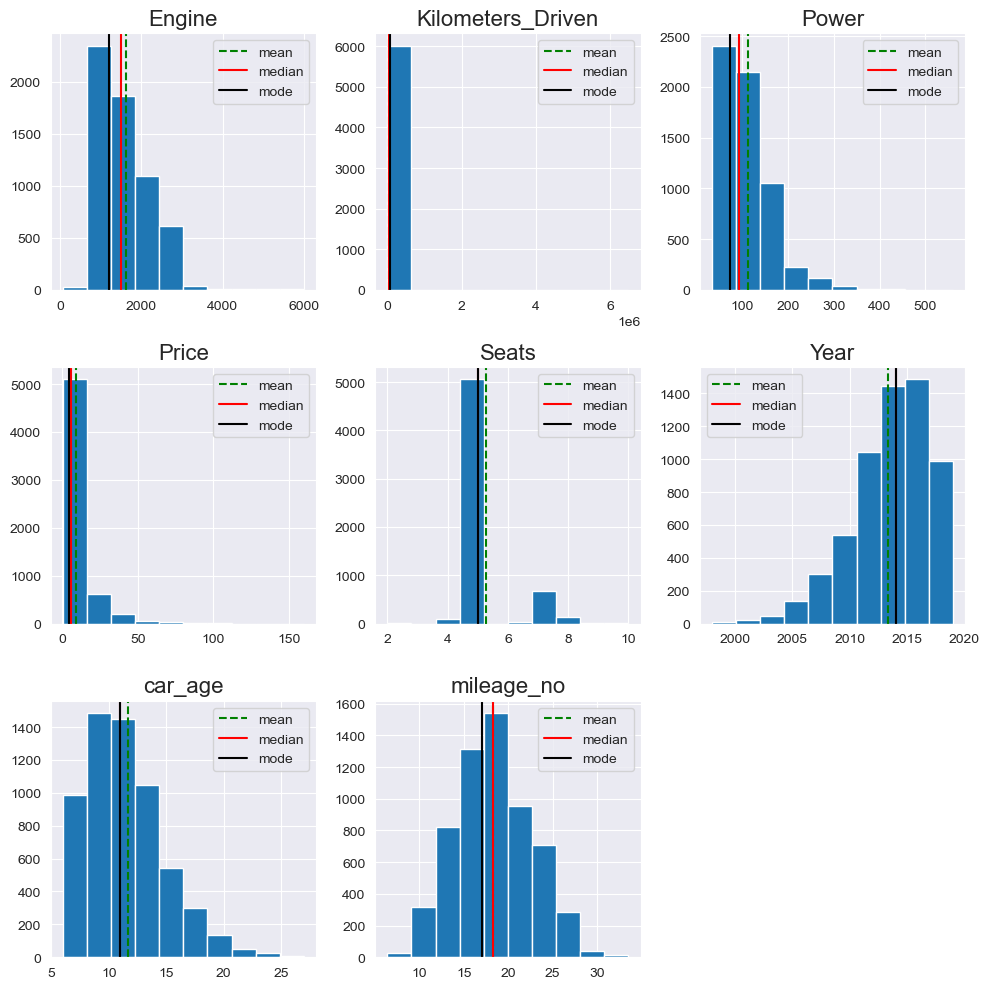

In [120]:
histogram_overview(df)

In [121]:
num_df = df.filter(num_var)
num_df.head()

,Engine,Kilometers_Driven,Power,Price,Seats,Year,car_age,mileage_no
0,1489.0,80000,35.5,1.35,5.0,2003,22,12.80
1,1968.0,79271,143.0,16.50,5.0,2014,11,20.38
2,1968.0,22000,143.0,22.50,5.0,2017,8,20.38
3,1968.0,20003,143.0,19.25,5.0,2016,9,20.38
4,1968.0,39000,143.0,18.90,5.0,2016,9,20.38


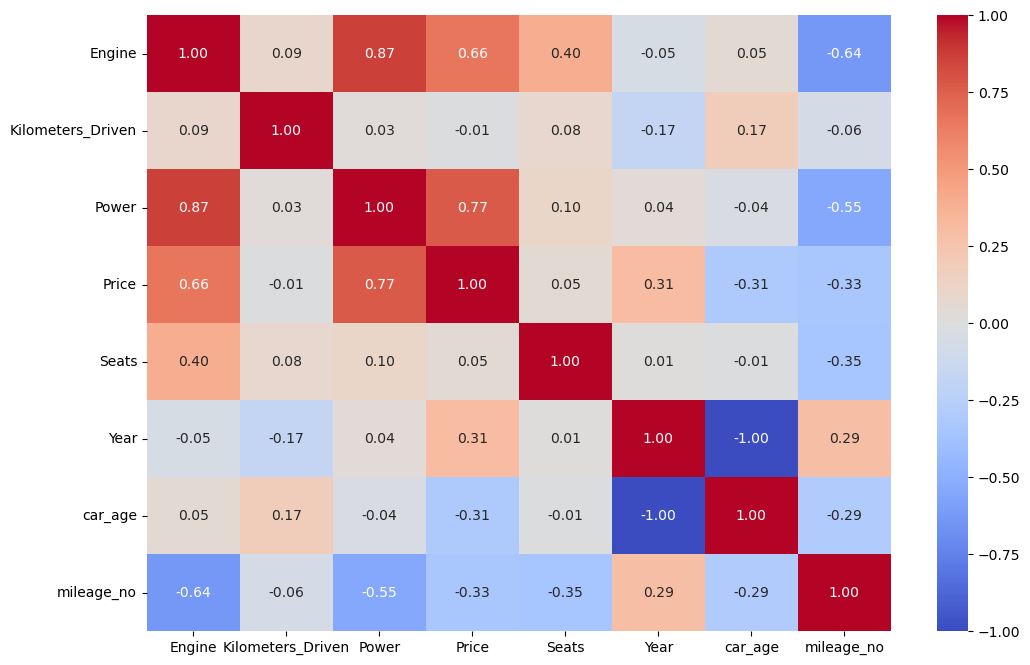

In [122]:
corr_matrix = num_df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

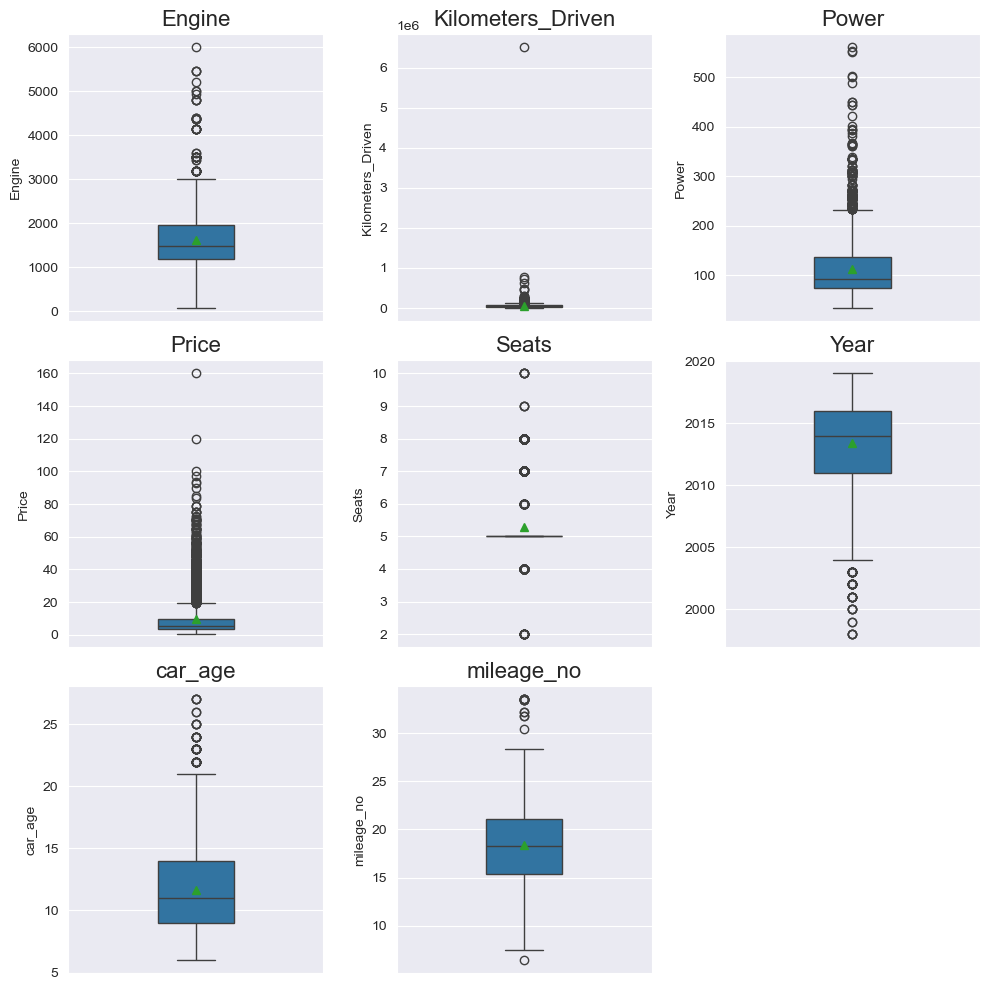

In [123]:
def boxplot_overview(df):
    """
    This function below generates a subplots of `box plots` &
    showing the `distribution of the numerical variable input with outliers`.

    * Generates subplots for each numerical variable in a three column structure.
    * The function takes the Pandas dataframe as the input
    * The function selects the numerical variables from the applied dataframe.
    * It shows the `mean` in the boxplot.
    * `sns.set_style` - sets the Seaborn theme
    * `subplot_nrows` - calculated number of subplot rows
    * `subplot_ncols` - configures the three column structure subplots
    * `figsize` - indicates the size of the plot
    * `sns.reset_defaults()` - resets Seaborn themes and settings to default
    """

    num_vars = df.select_dtypes(include=np.number).columns.to_list()
    plt.figure(figsize=(10, 10))
    for i in range(len(num_vars)):
        # Set seaborn theme
        sns.set_style("darkgrid")
        # Subplot no of columns
        subplot_ncols = math.ceil(np.sqrt(len(num_vars)) )  
        # Subplot no of rows
        subplot_nrows = math.ceil(len(num_vars) / subplot_ncols)  
          
        plt.subplot(subplot_nrows, subplot_ncols, i + 1)
        sns.boxplot(y=df[num_vars[i]], width=0.3, showmeans=True)
        plt.tight_layout()
        plt.title(num_vars[i], fontsize=16)
    plt.show()
    # Reset seaborn theme
    sns.reset_defaults()

boxplot_overview(df)

In [124]:
df.head()

,car_name,Engine,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Kilometers_Driven,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,...,Region_West,Seats,Transmission_Manual,Year,car_age,car_make,car_model,car_spec,mileage_no,mileage_unit
0,Ambassador Classic,1489.0,True,False,False,False,80000,False,False,True,...,False,5.0,True,2003,22,Ambassador,Classic,Nova Diesel,12.80,kmpl
1,Audi A3,1968.0,True,False,False,False,79271,False,False,False,...,False,5.0,False,2014,11,Audi,A3,35 TDI Attraction,20.38,kmpl
2,Audi A3,1968.0,True,False,False,False,22000,False,True,False,...,False,5.0,False,2017,8,Audi,A3,35 TDI Technology,20.38,kmpl
3,Audi A3,1968.0,True,False,False,False,20003,False,False,False,...,True,5.0,False,2016,9,Audi,A3,35 TDI Premium,20.38,kmpl
4,Audi A3,1968.0,True,False,False,False,39000,False,False,False,...,True,5.0,False,2016,9,Audi,A3,35 TDI Premium Plus,20.38,kmpl


In [125]:
df.to_csv('used_car_cleaned.csv', index=False)